### a)

In [35]:
import matplotlib.pyplot as plt

In [32]:
import sklearn
import numpy as np
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


In [15]:
np.random.seed(10)

n = 100

X = np.random.normal(loc=0, scale=1, size=n)

epsilon = np.random.normal(loc=0, scale=0.5, size=n)

print("First 5 elements of X:", X[:5])
print("First 5 elements of epsilon:", epsilon[:5])

First 5 elements of X: [ 1.3315865   0.71527897 -1.54540029 -0.00838385  0.62133597]
First 5 elements of epsilon: [ 0.05873783 -0.95372844 -0.46145463  0.23487572 -0.07218338]


### b)

In [16]:
B0 = 10
B1 = 1.5
B2 = -6
B3 = 0.2

Y = B0 + B1*X + B2*X**2 + B3*X**3 + epsilon
print(Y.shape)

(100,)


### c)

In [68]:
n_degree_polynomial_range = range(1, 11)

preds = list()
for degree in n_degree_polynomial_range:
    preds.append(X**degree)

preds = np.array(preds).transpose()
print(preds.shape)

(100, 10)


In [67]:
ols = LinearRegression()

forward_selec = SequentialFeatureSelector(
    ols, direction="forward", scoring="neg_mean_squared_error"
)

pipe = Pipeline([("selec", forward_selec), ("reg", ols)])

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid={"selec__n_features_to_select": n_degree_polynomial_range},
    scoring="neg_mean_squared_error",
)

grid_search.fit(preds, Y)


c:\Users\PC\Documents\envs\islp_py310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\PC\Documents\envs\islp_py310\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\PC\Documents\envs\islp_py310\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\PC\Documents\envs\islp_py310\lib\site-packages\sklearn\pipeline.py", line 423, in fit
    Xt = self._fit(X, y, **fi

GridSearchCV(estimator=Pipeline(steps=[('selec',
                                        SequentialFeatureSelector(estimator=LinearRegression(),
                                                                  scoring='neg_mean_squared_error')),
                                       ('reg', LinearRegression())]),
             param_grid={'selec__n_features_to_select': range(1, 10)},
             scoring='neg_mean_squared_error')

In [20]:

grid_search.best_params_


{'selec__n_features_to_select': 3}

In [21]:
grid_search.best_estimator_.named_steps["selec"].support_

array([ True,  True,  True, False, False, False, False, False, False,
       False])

In [24]:
grid_search.best_estimator_.named_steps["reg"].coef_

array([ 1.52341804, -6.01445679,  0.20415164])

## d)

In [25]:
ols = LinearRegression()

forward_selec = SequentialFeatureSelector(
    ols, direction="backward", scoring="neg_mean_squared_error"
)

pipe = Pipeline([("selec", forward_selec), ("reg", ols)])

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid={"selec__n_features_to_select": n_degree_polynomial_range},
    scoring="neg_mean_squared_error",
)

grid_search.fit(preds, Y)


c:\Users\PC\Documents\envs\islp_py310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\PC\Documents\envs\islp_py310\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\PC\Documents\envs\islp_py310\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\PC\Documents\envs\islp_py310\lib\site-packages\sklearn\pipeline.py", line 423, in fit
    Xt = self._fit(X, y, **fi

GridSearchCV(estimator=Pipeline(steps=[('selec',
                                        SequentialFeatureSelector(direction='backward',
                                                                  estimator=LinearRegression(),
                                                                  scoring='neg_mean_squared_error')),
                                       ('reg', LinearRegression())]),
             param_grid={'selec__n_features_to_select': range(1, 11)},
             scoring='neg_mean_squared_error')

In [26]:

grid_search.best_params_


{'selec__n_features_to_select': 3}

In [27]:
grid_search.best_estimator_.named_steps["selec"].support_

array([ True,  True, False, False,  True, False, False, False, False,
       False])

In [28]:
grid_search.best_estimator_.named_steps["reg"].coef_

array([ 1.74325609, -6.046353  ,  0.0320367 ])

### e)

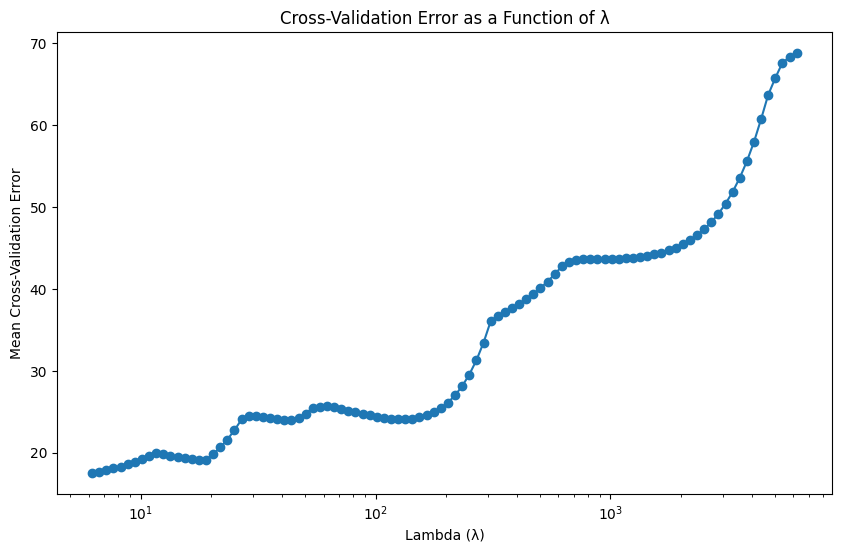

Lasso Coefficient Estimates:
[ 0.         -0.          0.         -0.          0.         -0.
  0.02418934 -0.20706001  0.          0.02978659]


In [37]:
# Fit Lasso model with cross-validation to select optimal lambda
lasso_cv = LassoCV(cv=10, random_state=0, max_iter=10000)
lasso_cv.fit(preds, Y)

# Plot cross-validation error as a function of lambda
plt.figure(figsize=(10, 6))
plt.plot(lasso_cv.alphas_, np.mean(lasso_cv.mse_path_, axis=1), marker='o')
plt.xlabel('Lambda (λ)')
plt.ylabel('Mean Cross-Validation Error')
plt.title('Cross-Validation Error as a Function of λ')
plt.xscale('log')
plt.show()

# Report the resulting coefficient estimates
lasso_coef = lasso_cv.coef_
print("Lasso Coefficient Estimates:")
print(lasso_coef)


In [38]:
lasso_cv.alpha_

6.2078060891248965

### e)

In [40]:
B0 = 10
B7 = 70

Y = B0 + B7*X**7 + epsilon
print(Y)

[ 5.29676196e+02  1.57516957e+01 -1.46407963e+03  1.02348757e+01
  1.24303711e+01  2.77265893e+00  9.85851959e+00  1.04241167e+01
  1.03534152e+01  9.60601927e+00  1.03463172e+01  2.65065220e+02
 -4.33731344e+01  9.47167422e+01  9.84587139e+00  1.00679733e+01
 -1.61756398e+02  1.00706097e+01  1.12247056e+03 -1.10625352e+02
 -8.27475040e+03 -3.41698891e+03  1.06247107e+01  3.07350434e+04
  1.69044889e+02  2.57396673e+03  1.05112646e+01  7.40617284e+02
  1.08207958e+01  1.26160403e+01  9.87819879e+00  8.37885669e+00
  9.68006944e+00  9.76853819e+00  4.69062825e+02  9.88985427e+00
  1.07850733e+01  9.97964371e+00  3.57066223e+02  2.84317043e+00
  1.36841856e+01  9.27451596e+00 -3.52262534e+01  9.28932713e+00
 -5.09117326e+00  1.08058254e+01  9.40232752e+00  9.82585856e+00
  1.14551916e+01  1.05673807e+01  1.02553572e+01  1.02189622e+01
  9.73649530e+00  1.64987419e+01  3.09238361e+01  1.00296571e+01
  3.16222665e+04  4.85738365e+01  1.04712345e+01  8.45297830e+00
  1.06065282e+01  9.41148

In [69]:
ols = LinearRegression()

forward_selec = SequentialFeatureSelector(
    ols, direction="forward", scoring="neg_mean_squared_error"
)

pipe = Pipeline([("selec", forward_selec), ("reg", ols)])

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid={"selec__n_features_to_select": n_degree_polynomial_range},
    scoring="neg_mean_squared_error",
)

grid_search.fit(preds, Y)


c:\Users\PC\Documents\envs\islp_py310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\PC\Documents\envs\islp_py310\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\PC\Documents\envs\islp_py310\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\PC\Documents\envs\islp_py310\lib\site-packages\sklearn\pipeline.py", line 423, in fit
    Xt = self._fit(X, y, **fi

GridSearchCV(estimator=Pipeline(steps=[('selec',
                                        SequentialFeatureSelector(estimator=LinearRegression(),
                                                                  scoring='neg_mean_squared_error')),
                                       ('reg', LinearRegression())]),
             param_grid={'selec__n_features_to_select': range(1, 11)},
             scoring='neg_mean_squared_error')

In [70]:

grid_search.best_params_


{'selec__n_features_to_select': 1}

In [71]:
grid_search.best_estimator_.named_steps["selec"].support_


array([False, False, False, False, False, False,  True, False, False,
       False])

In [73]:
grid_search.best_estimator_.named_steps["reg"].coef_

array([70.00026042])

Lasso

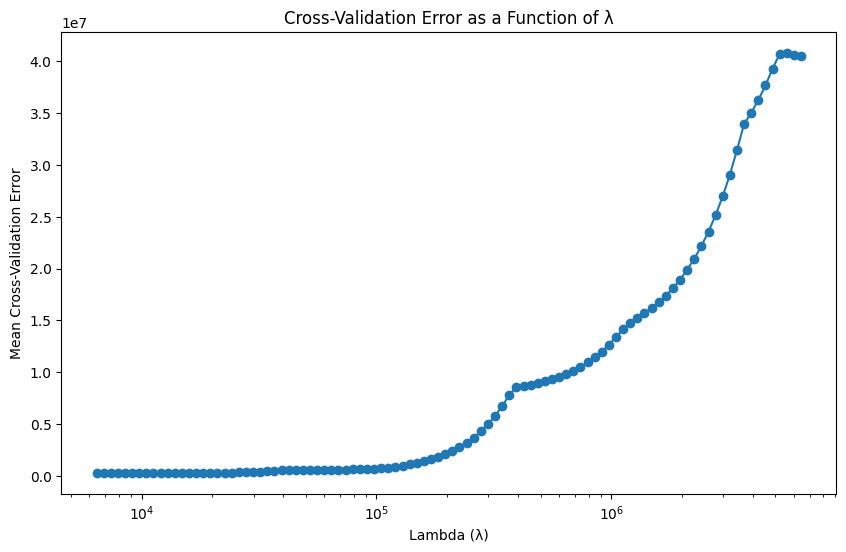

Lasso Coefficient Estimates:
[ 0.          0.          0.          0.          0.          0.
  0.         -0.         14.32368274 -0.98473112]


In [74]:
# Fit Lasso model with cross-validation to select optimal lambda
lasso_cv = LassoCV(cv=10, random_state=0, max_iter=10000)
lasso_cv.fit(preds, Y)

# Plot cross-validation error as a function of lambda
plt.figure(figsize=(10, 6))
plt.plot(lasso_cv.alphas_, np.mean(lasso_cv.mse_path_, axis=1), marker='o')
plt.xlabel('Lambda (λ)')
plt.ylabel('Mean Cross-Validation Error')
plt.title('Cross-Validation Error as a Function of λ')
plt.xscale('log')
plt.show()

# Report the resulting coefficient estimates
lasso_coef = lasso_cv.coef_
print("Lasso Coefficient Estimates:")
print(lasso_coef)